In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad, quad

In [2]:
l = 650 * 1e-5 # см
b = 100 # см
a = 1 # см
c = 1 # см

print('a^2 / bl\t(b / a)^2')
print('{:.4f}'.format(a**2 / b / l), '\t', (b / a)**2)

a^2 / bl	(b / a)^2
1.5385 	 10000.0


In [5]:
N, M = 10, 10
x, dx = np.linspace(-a, a, N, retstep=True)
y, dy = np.linspace(-c, c, M, retstep=True)
# dx, dy = 2 * c / (N - 1), 2 * a / (M - 1)

# V0 = np.ones((N, N), dtype=np.complex64)

In [3]:
A = (1. + 1.j) / np.sqrt(2 * l * b) 

def K(x2, x1):
    return A * np.exp(-1.j * np.pi * np.square(x2 - x1) / b)

(2.7735009811261455+2.7735009811261455j)

In [13]:
np.sqrt(np.trapz(np.trapz(V0 * np.conj(V0), dx=dx), dx=dy))

(0.0097211115+0j)

In [6]:
V1 = np.ones(N, dtype=np.complex64)
V2 = np.zeros(N, dtype=np.complex64)

# for step in range(10):

for i, x2 in enumerate(V2):
    V2[i] = np.trapz(K(x, x2) * V1, x)

alpha = np.sqrt(np.trapz(V2 * np.conj(V2), x))
V2 /= alpha
V1 = V2.copy()


In [82]:
for i, x2 in enumerate(V2):
    V2[i] = np.trapz(K(x, x2) * V1, x)

alpha = np.sqrt(np.trapz(V2 * np.conj(V2), x))
V2 /= alpha
V1 = V2.copy()

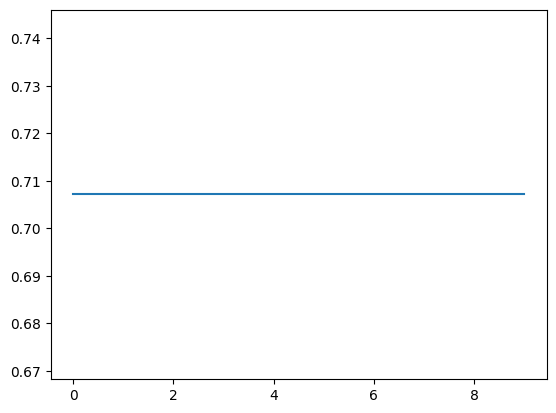

In [8]:
# plt.plot(np.abs(V1))
plt.plot(np.abs(V1))

---

In [193]:
N = 20
x, dx = np.linspace(-a, a, N, retstep=True)

V1 = np.ones(N, dtype=np.complex64)
# V1[3:7] = 1
V2 = np.zeros(N, dtype=np.complex64)

error = []

A = (1. + 1.j) * np.exp(-2.j * np.pi * b / l) / np.sqrt(2 * l * b) 
# A = 1

for step in range(10):

    for i in range(V2.shape[0]):
        V2[i] = np.trapz(np.exp(-1.j * np.pi * np.square(x[i] - x) / b) * V1, x)
        # print(V2[i])

    V2 *= A 
    error.append(np.sum(np.abs(V2 - V1)))

    V1 = V2.copy()

In [123]:
for i, x2 in enumerate(V2):
    V2[i] = np.trapz(np.exp(-1.j * np.pi * np.square(x2 - x) / b) * V1, x)

V2 *= A 
V1 = V2.copy()

In [115]:
np.exp(-1.j * np.pi * np.square(0.5 + 0.5) / b)

(0.9510565162951535-0.3090169943749474j)

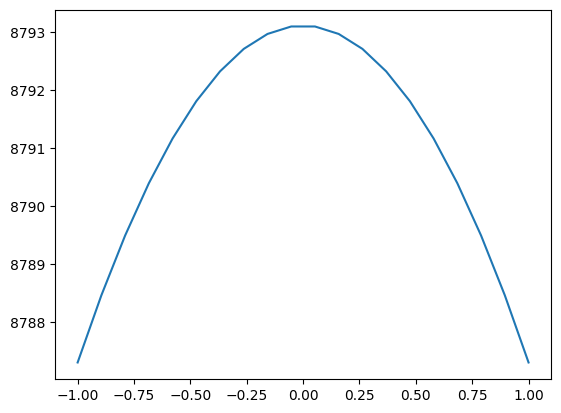

In [194]:
plt.plot(x, np.abs(V2))
# plt.ylim(1.1, 1.105)

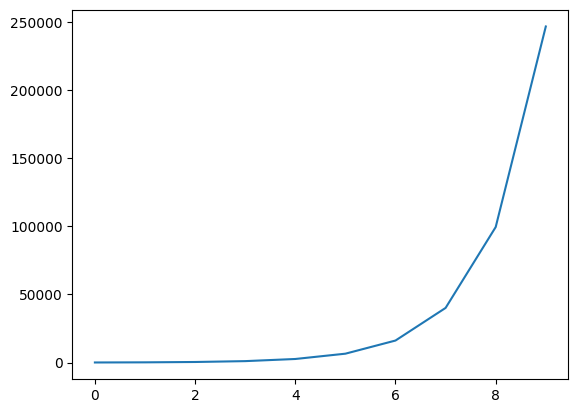

In [195]:
plt.plot(error)

(1.5626929123605002-0.6409380937768254j)

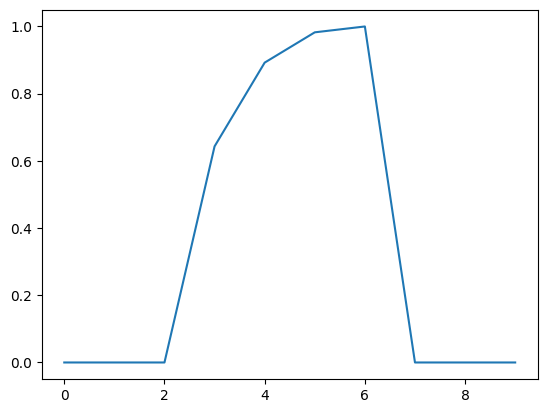

In [170]:
V1 = np.zeros(10, dtype=np.complex64)
V1[3:7] = 1
x, dx = np.linspace(-a, a, 10, retstep=True)
x1 = 1

plt.plot(np.real(np.exp(-1.j * np.pi * np.square(x1 - x) / b) * V1))

np.trapz(np.exp(-1.j * np.pi * np.square(x1 - x) / b) * V1, x)

In [164]:
print(np.abs(0.8886148024936673-0.017234665078853895j))
print(np.abs(0.8818343963817594-0.08660354388098143j))
print(np.abs(0.8296422818771056-0.2873279091285932j))

0.8887819197594197
0.886076789254028
0.8779884072369406


---

In [121]:
a = 25
b = 100

In [122]:
A = (1. + 1.j) / np.sqrt(2 * b) 

def K(x2, x1):
    return A * np.exp(-1.j * np.pi * np.square(x2 - x1) / b)

In [123]:
A = 0.5j

def K_forward(x2, x1, phi):
    rho = np.sqrt((x2 - x1)**2 + (x2*np.tan(phi) + b)**2)
    cos_theta = (b + x2 * np.tan(phi)) / rho
    return A * np.exp(2.j * np.pi * rho) / rho * (1 + cos_theta)

def K_backward(x2, x1, phi):
    rho = np.sqrt((x2 - x1)**2 + (x1*np.tan(phi) + b)**2)
    cos_theta = (b + x1 * np.tan(phi)) / rho
    sin_theta = np.sqrt(1 - cos_theta**2)
    cos_theta_plus_phi = cos_theta * np.cos(phi) - sin_theta * np.sin(phi)
    return A * np.exp(2.j * np.pi * rho) / rho * (1 + cos_theta_plus_phi)

In [127]:
N = 100
x, dx = np.linspace(-a, a, N, retstep=True)

# phi = 1 / 4 / a
phi = 0
# phi = np.deg2rad(1)

# V1 = np.ones(N, dtype=np.complex64)
V1 = np.ones(N, dtype=np.complex64)
V1[:N//2] = -1
# V1[40:60] = 1
# V1[70:80] = 1
V2 = np.zeros(N, dtype=np.complex64)

alpha, gamma = 0, 0.j
alpha_vec, gamma_vec = [], []

for step in range(1000):

    for i in range(V2.shape[0]):
        # if i % 2 == 0:
        #     V2[i] = np.trapz(K_forward(x[i], x, phi) * V1, x)
        # elif i % 2 != 0:
        #     V2[i] = np.trapz(K_backward(x[i], x, phi) * V1, x)

        V2[i] = np.trapz(K(x[i], x) * V1, x)

    alpha = np.sqrt(np.trapz(V1*np.conj(V1), x))
    alpha_vec.append(alpha)

    gamma = np.trapz(V1*np.conj(V2), x)
    gamma_vec.append(gamma)


    # V2 /= np.max(V2)
    V2 /= alpha

    V1 = V2.copy()

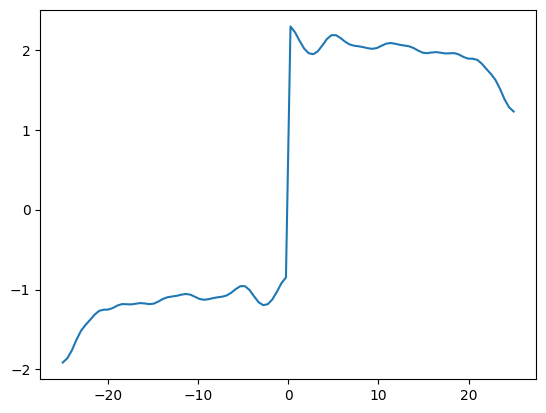

In [136]:
plt.plot(x, np.angle(V2))
# plt.plot(x, np.sinc(np.pi * x / np.sqrt(x*x + b*b)))

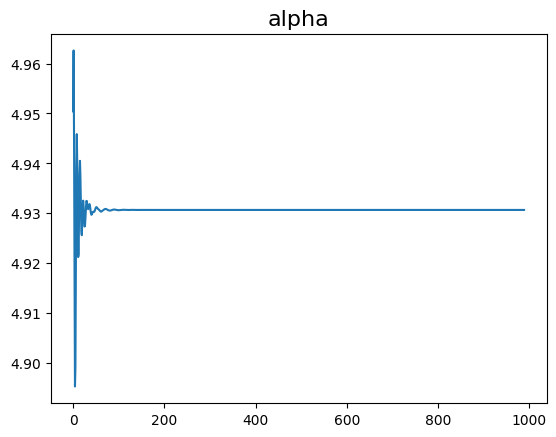

In [129]:
plt.title('alpha', fontsize=16)
plt.plot(np.abs(alpha_vec[10:]))
# plt.ylim(0, 0.1)

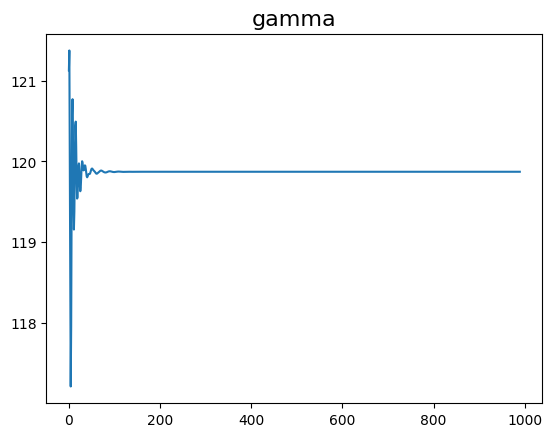

In [130]:
plt.title('gamma', fontsize=16)
plt.plot(np.abs(gamma_vec[10:]))

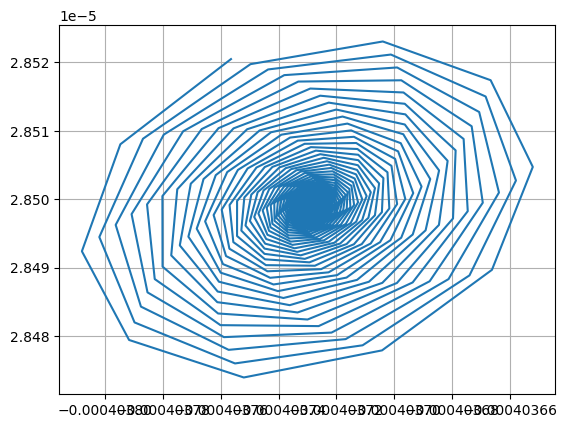

In [66]:
# np.mean(gamma_vec[-10:])
plt.plot(np.real(gamma_vec[-4000:]), np.imag(gamma_vec[-4000:]))
plt.scatter(np.real(gamma_vec[-1]), np.imag(gamma_vec[-1]))
# plt.plot(np.abs(alpha_vec))
plt.grid()
# plt.xlim(-np.max(np.real(gamma_vec[10:])), np.max(np.real(gamma_vec[10:])))
# plt.ylim(-1.1*np.max(np.imag(gamma_vec[10:])), 1.1*np.max(np.imag(gamma_vec[10:])))

(-0.01, 0.01)

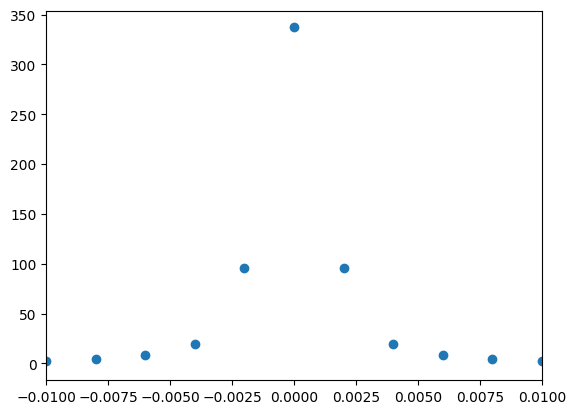

In [50]:
sp = np.fft.fft(V2)

freq = np.fft.fftfreq(N)
plt.scatter(freq, np.abs(sp))
plt.xlim(-0.01, 0.01)